Training MNIST using a Convolutional neural network.
First have to import the Data

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist


Examing the data. Using Mat plotlib to view the data.

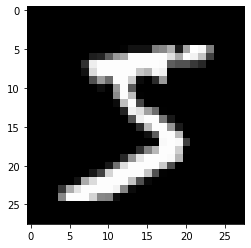

In [2]:
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[0], cmap='gray')

Preparing the dataset for Training.
    Questions
        What is the shape of the data? The data is a numpy array, with a shape of (6000, 28, 28)
        Is the data normalized? No, normalized to [0,1]

<class 'numpy.ndarray'>
(60000, 28, 28)
[  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
 175  26 166 255 247 127   0   0   0   0]


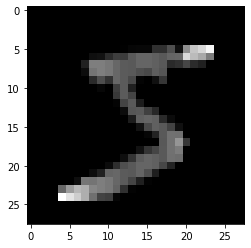

In [3]:
print(type(x_train))
print(x_train.shape)
print(x_train[0][5])
# Normalizing could have also divided by 255 since it is only a signal channel
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
# Reshaping 
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
plt.imshow(x_train[0], cmap='gray')

Creating The CNN

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

Complie the model and test it. 

In [5]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 85s 1ms/sample - loss: 0.1902 - accuracy: 0.9427 - val_loss: 0.0525 - val_accuracy: 0.9837
Epoch 2/10
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.0803 - accuracy: 0.9758 - val_loss: 0.0444 - val_accuracy: 0.9861
Epoch 3/10
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.0622 - accuracy: 0.9806 - val_loss: 0.0364 - val_accuracy: 0.9880
Epoch 4/10
60000/60000 [==============================] - 85s 1ms/sample - loss: 0.0505 - accuracy: 0.9844 - val_loss: 0.0322 - val_accuracy: 0.9899
Epoch 5/10
60000/60000 [==============================] - 90s 2ms/sample - loss: 0.0452 - accuracy: 0.9852 - val_loss: 0.0339 - val_accuracy: 0.9895
Epoch 6/10
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.0398 - accuracy: 0.9877 - val_loss: 0.0302 - val_accuracy: 0.9910
Epoch 7/10
60000/60000 [==============================] 

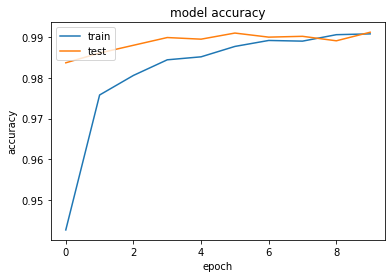

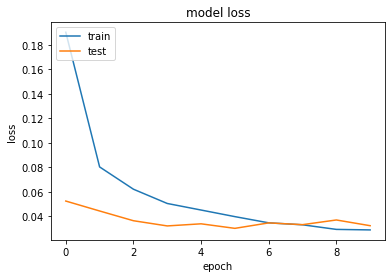

In [6]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
# Saving 
model.save("mnist.h5")